In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Данные из первой лабораторной работы

In [2]:
df_norm = pd.read_excel("22_2022_СЗН.xlsx")
df = pd.DataFrame(df_norm)
df_norm

,Возраст,"Да, ежедневно",Не каждый день (периодически),"Нет, совсем не курю и не курил ранее",Бросил курить,Отказ от ответа
0,15-19 лет,3.183661,1.576591,93.250286,1.211762,0.777701
1,20-24 лет,10.730690,3.624435,80.256460,4.710394,0.678021
2,25-29 лет,15.407079,4.558647,70.855764,8.577288,0.601222
3,30-34 лет,18.662320,4.166731,66.647848,9.895205,0.627896
4,35-39 лет,21.807080,4.433298,61.672864,11.329623,0.757135
5,40-44 лет,25.085814,4.066897,58.860938,11.063912,0.922439
6,45-49 лет,25.471021,3.795270,58.491302,11.541034,0.701374
7,50-54 лет,22.118263,3.541141,61.836534,11.936647,0.567415
8,55-59 лет,20.580492,2.237264,64.988412,11.890358,0.303474
9,60-64 лет,16.192445,1.624702,67.597857,14.236651,0.348346


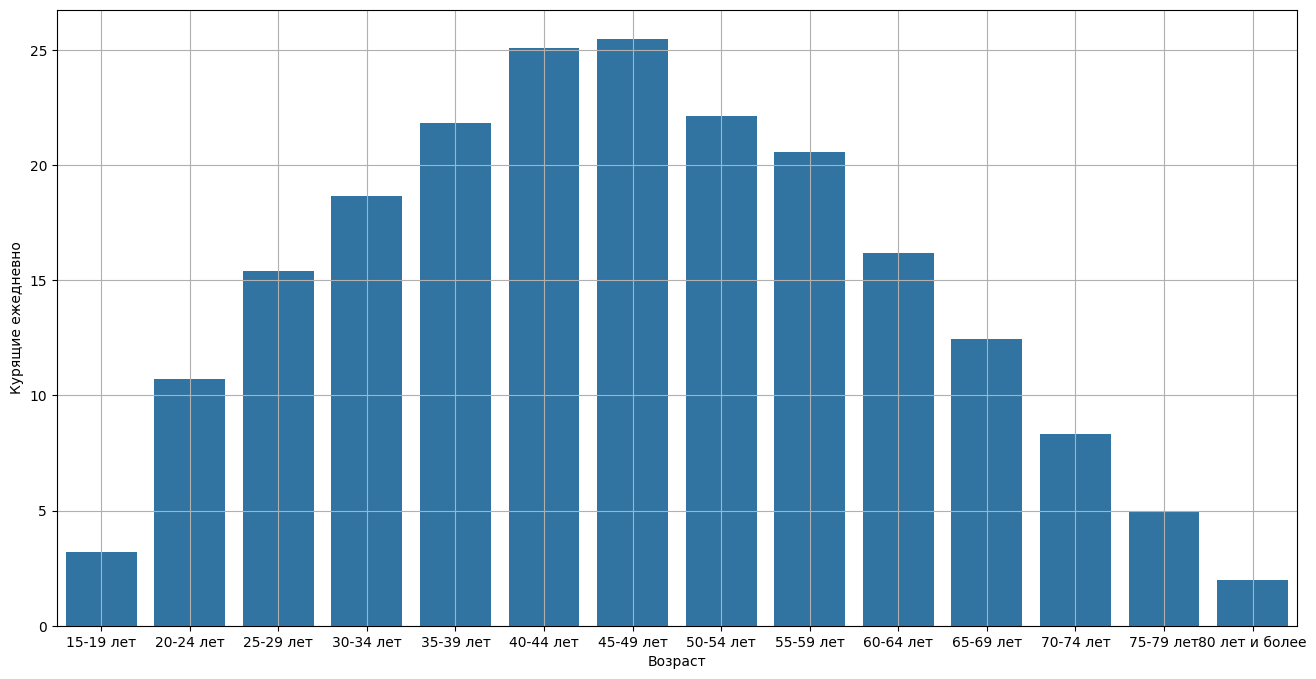

In [3]:
fig = plt.figure(figsize=(16, 8))
ax = sns.barplot(y=df_norm['Да, ежедневно '], x=df_norm["Возраст"])
plt.ylabel("Курящие ежедневно")
plt.grid()
plt.show()

Посчитаем средний возраст в каждой группе, для этого напишем функцию

In [4]:
def mean_age(ages):
    numbers = [int(item) for item in ages.split()[0].split("-")]
    result = int(np.mean(numbers)) if len(numbers) == 2 else numbers[0] + 5
    return result
df_norm["Средний возраст"] = df_norm["Возраст"].apply(mean_age)
df_norm["Средний возраст"]

0     17
1     22
2     27
3     32
4     37
5     42
6     47
7     52
8     57
9     62
10    67
11    72
12    77
13    85
Name: Средний возраст, dtype: int64

Математическое ожидание

In [5]:
mean_value = np.average(df_norm["Средний возраст"], weights=df_norm["Да, ежедневно "])
mean_value

46.74201601284539

Дисперсия

In [6]:
variance = np.average((df_norm["Средний возраст"] - mean_value)**2, weights=df_norm["Да, ежедневно "])
variance

224.85168088453614

Асимметрия

In [7]:
skewness = stats.skew(df_norm["Средний возраст"], bias=False)
skewness

0.061623586092082946

Эксцесс

In [8]:
kurtosis = stats.kurtosis(df_norm["Средний возраст"], bias=False, fisher=True)
kurtosis

-1.101896480713175

Квантили

In [9]:
quantiles = np.percentile(df_norm["Средний возраст"], [2.5, 5, 95])
quantiles

array([18.625, 20.25 , 79.8  ])

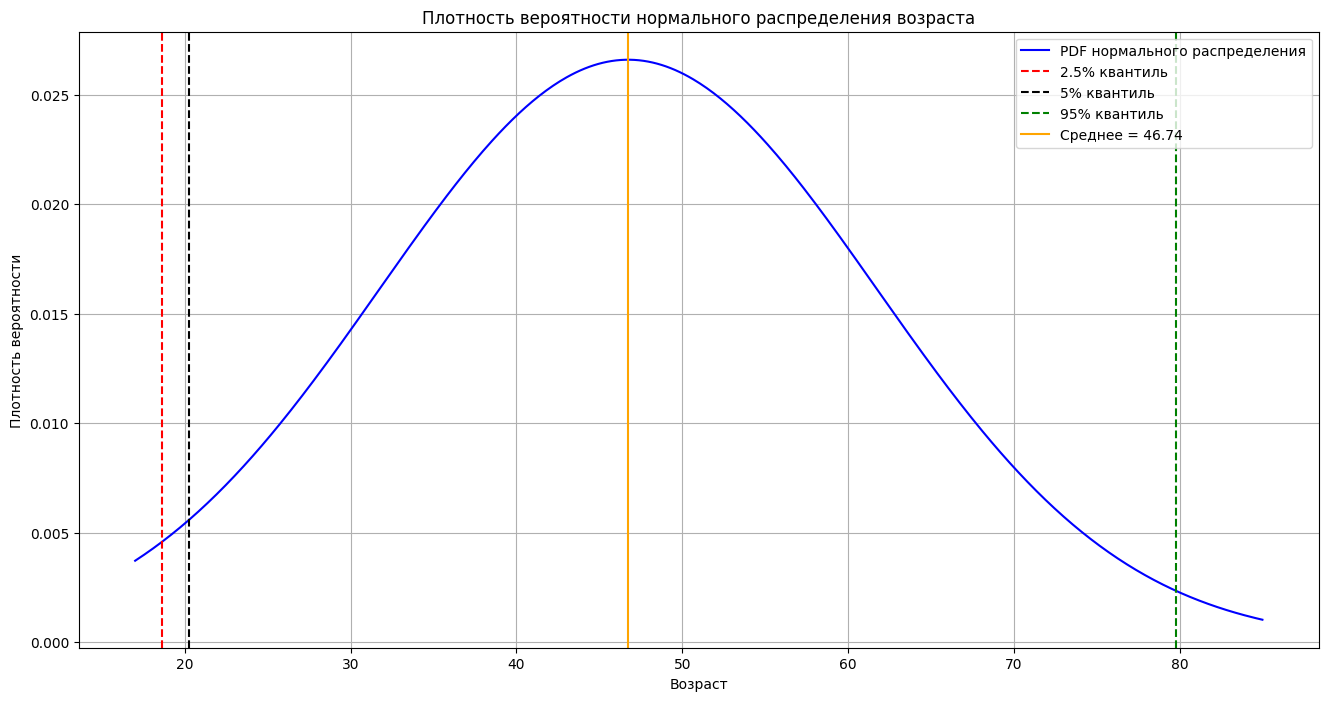

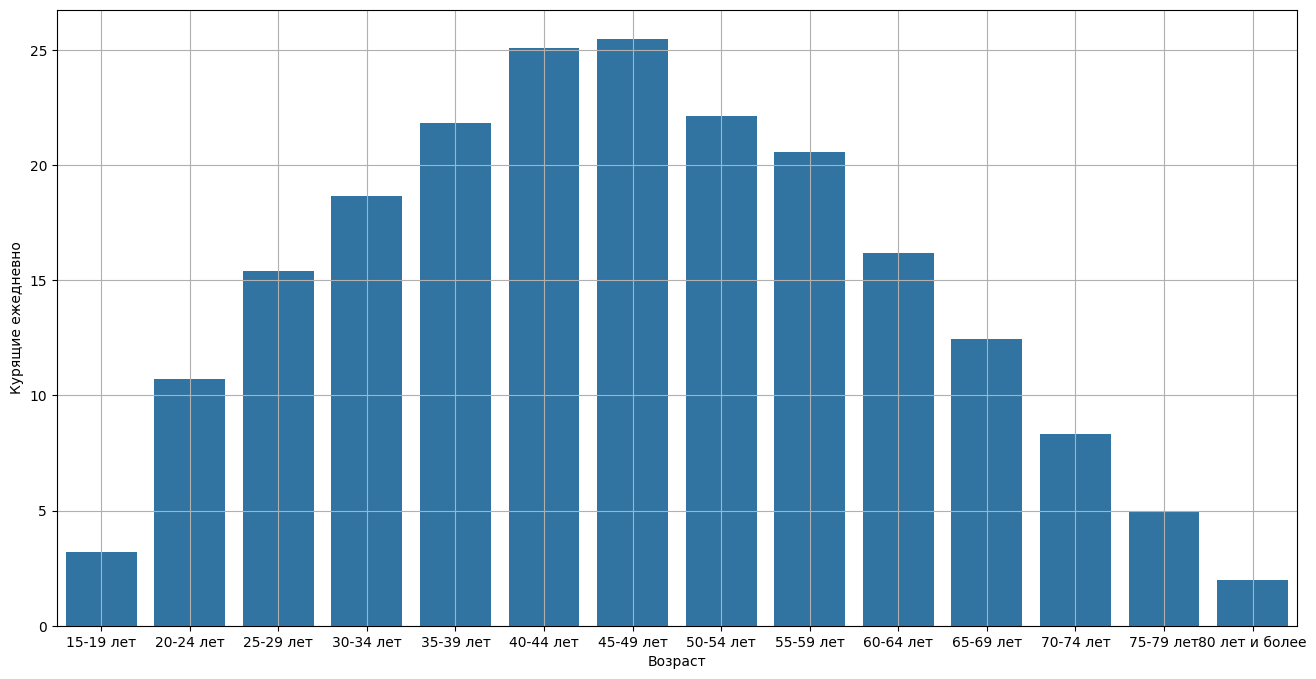

In [10]:
mu = mean_value
sigma = np.sqrt(variance) 

x = np.linspace(min(df_norm["Средний возраст"]), max(df_norm["Средний возраст"]), 500)

def pdf_norm(x, mu, sigma):
    return 1 / (np.sqrt(2 * np.pi * sigma ** 2)) * np.exp(-(x - mu) ** 2 / (2 * sigma ** 2))

y = pdf_norm(x, mu, sigma)

plt.figure(figsize=(16, 8))
plt.plot(x, y, color='blue', label='PDF нормального распределения')
plt.title('Плотность вероятности нормального распределения возраста')
plt.xlabel('Возраст')
plt.ylabel('Плотность вероятности')
plt.axvline(quantiles[0], color='red', linestyle='--', label='2.5% квантиль')
plt.axvline(quantiles[1], color='black', linestyle='--', label='5% квантиль')
plt.axvline(quantiles[2], color='green', linestyle='--', label='95% квантиль')
plt.axvline(mu, color='orange', linestyle='-', label=f'Среднее = {mu:.2f}')
plt.legend()
plt.grid()
plt.show()
fig = plt.figure(figsize=(16, 8))
ax = sns.barplot(y=df_norm['Да, ежедневно '], x=df_norm["Возраст"])
plt.ylabel("Курящие ежедневно")
plt.grid()
plt.show()

https://www.kaggle.com/datasets/joshjohnson9596/student-attendance-and-weather-conditions/data
Посещаемость студентов

In [11]:
data = pd.read_csv("student_attendance.csv")
df_2 = pd.DataFrame(data)
df_2

,Weather,Temperature,Attendance
0,Sunny,5.780964,Present
1,Snowy,10.639905,Absent
2,Rainy,18.034428,Present
3,Sunny,14.250122,Present
4,Snowy,27.504825,Absent
...,...,...,...
9995,Cloudy,21.344979,Present
9996,Rainy,6.315741,Present
9997,Cloudy,20.471348,Absent
9998,Snowy,20.774593,Absent


В данном наборе данных рассмотрим распределение температуры для всех данных.

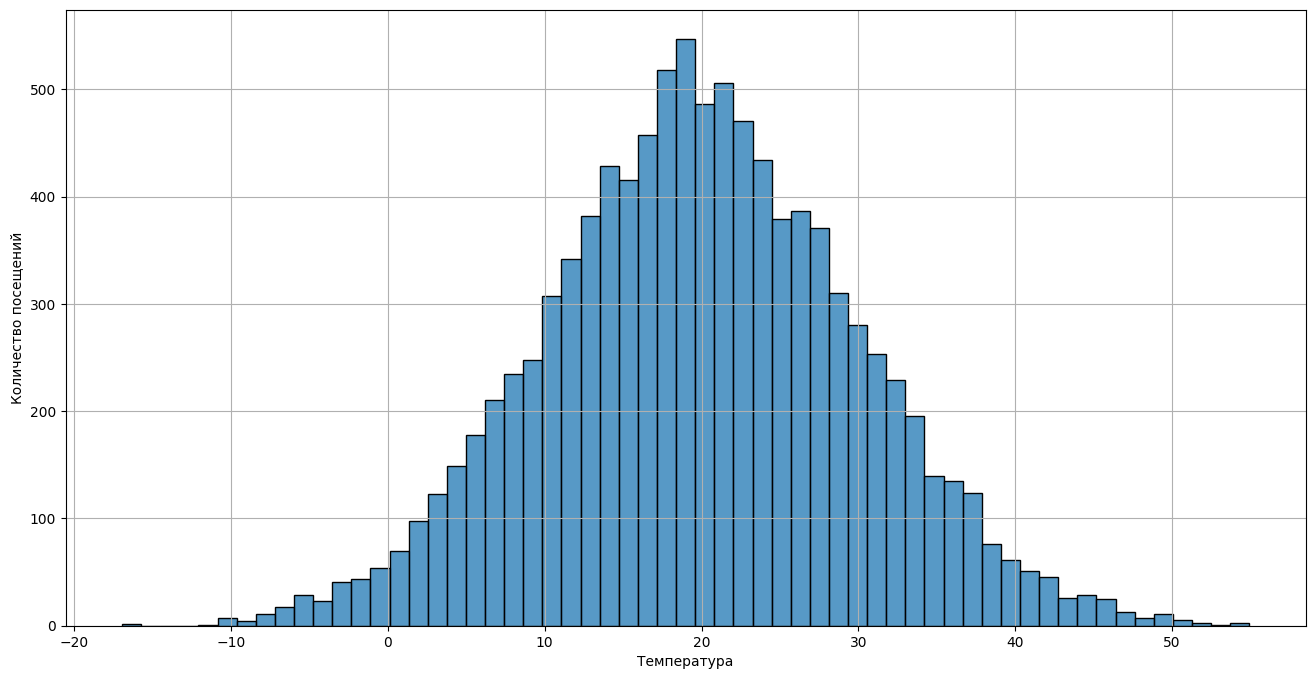

In [12]:
fig = plt.figure(figsize=(16, 8))
sns.histplot(data=data, x=data['Temperature'])
plt.ylabel("Количество посещений")
plt.xlabel("Температура")
plt.grid()
plt.show()

Математическое ожидание

In [13]:
mean_value = np.average(df_2["Temperature"])
mean_value

19.886668539170437

Дисперсия

In [14]:
variance = np.average((df_2["Temperature"] - mean_value)**2)
variance

99.20333627119297

Асимметрия

In [15]:
skewness = stats.skew(df_2["Temperature"], bias=False)
skewness

0.03543189268562405

Эксцесс

In [16]:
kurtosis = stats.kurtosis(df_2["Temperature"], bias=False, fisher=True)
kurtosis

0.006730377722527603

Квантили

In [17]:
quantiles = np.percentile(df_2["Temperature"], [2.5, 5, 95])
quantiles

array([ 0.39972721,  3.49240072, 36.39289429])

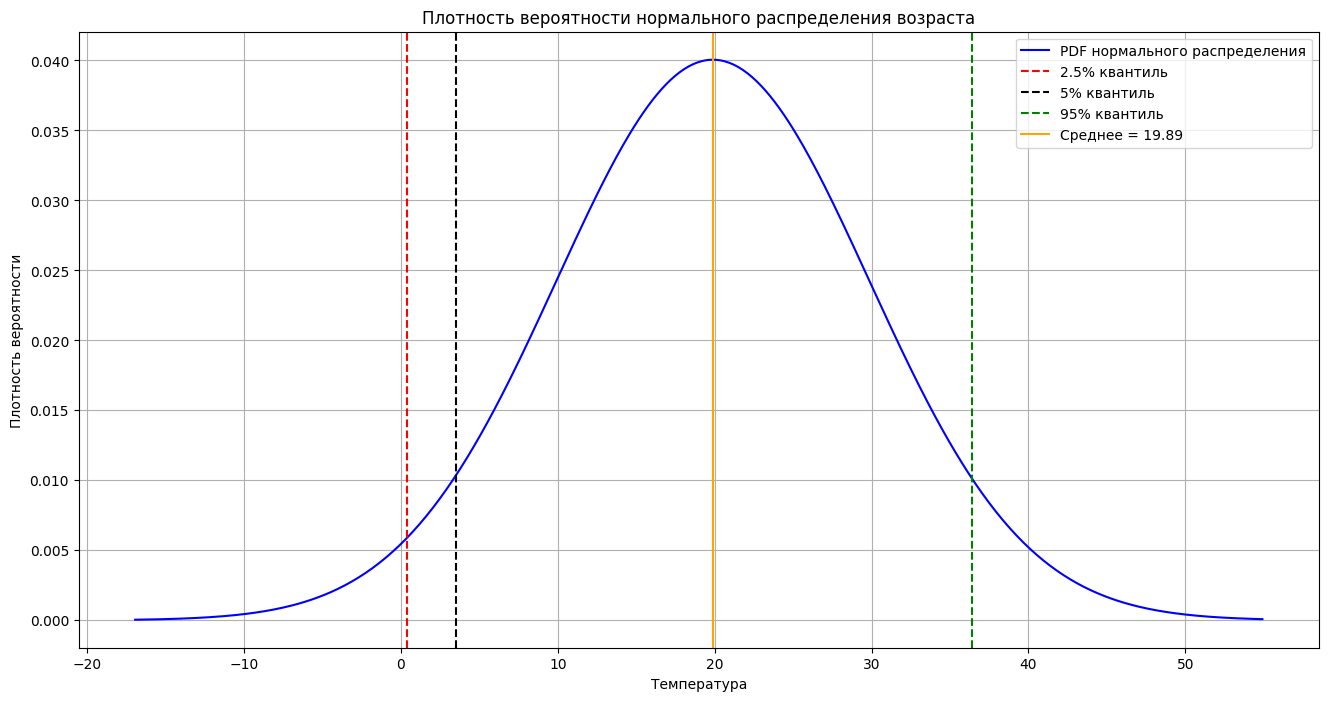

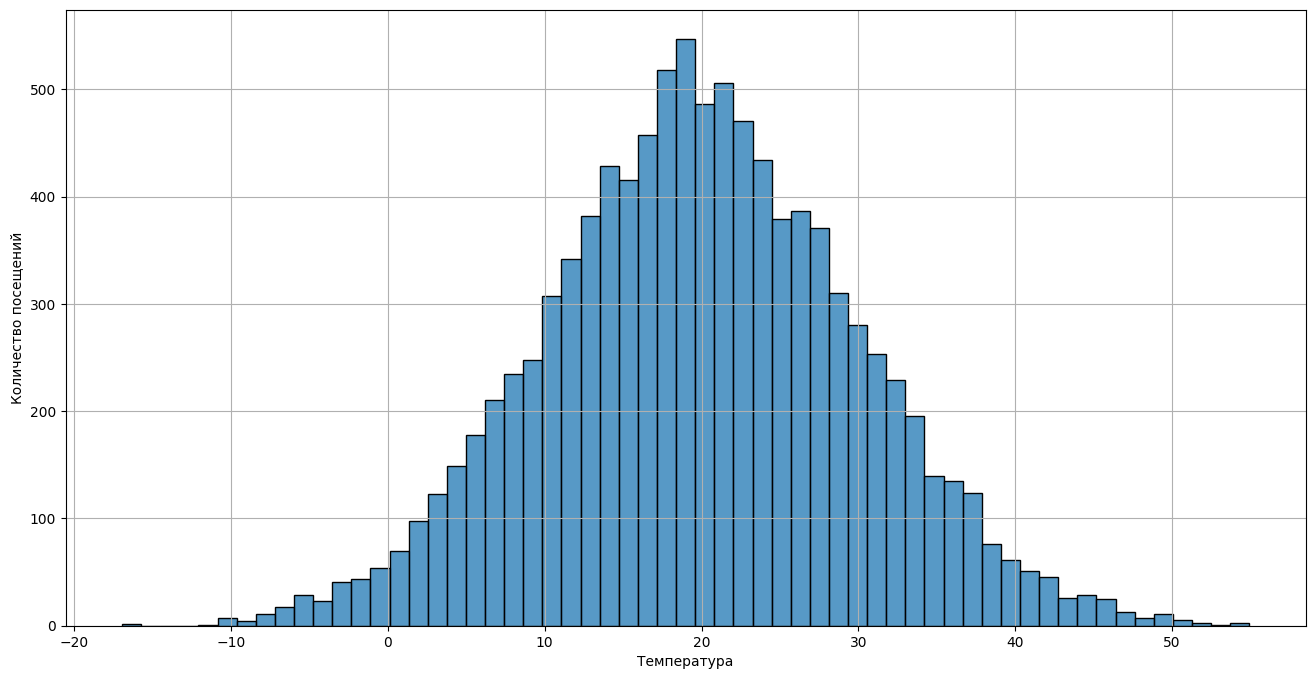

In [18]:
mu = mean_value
sigma = np.sqrt(variance) 

x = np.linspace(min(df_2["Temperature"]), max(df_2["Temperature"]), 500)

def pdf_norm(x, mu, sigma):
    return 1 / (np.sqrt(2 * np.pi * sigma ** 2)) * np.exp(-(x - mu) ** 2 / (2 * sigma ** 2))

y = pdf_norm(x, mu, sigma)

plt.figure(figsize=(16, 8))
plt.plot(x, y, color='blue', label='PDF нормального распределения')
plt.title('Плотность вероятности нормального распределения возраста')
plt.xlabel('Температура')
plt.ylabel('Плотность вероятности')
plt.axvline(quantiles[0], color='red', linestyle='--', label='2.5% квантиль')
plt.axvline(quantiles[1], color='black', linestyle='--', label='5% квантиль')
plt.axvline(quantiles[2], color='green', linestyle='--', label='95% квантиль')
plt.axvline(mu, color='orange', linestyle='-', label=f'Среднее = {mu:.2f}')
plt.legend()
plt.grid()
plt.show()

fig = plt.figure(figsize=(16, 8))
sns.histplot(data=data, x=data['Temperature'])
plt.ylabel("Количество посещений")
plt.xlabel("Температура")
plt.grid()
plt.show()